In [1]:
#Updated Model

In [2]:
# Updates to the model:
# 1. Adding two more hidden layers 
# 2. Running the model with a different number of features to see if accuracy and loss are affected
# 3. Altering activation functions to see if model accuracy improves 
# 4. Tested out different models such as a random forest model

In [3]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import psycopg2

%matplotlib inline

In [4]:
# Postgres username, password, and database name (change accordingly)
postgres_address = 'localhost'
postgres_port = '5432' 
postgres_username = 'postgres' 
postgres_password = '********'
postgres_dbname = 'cardio_disease_db'
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=postgres_username,
                        password=postgres_password,
                        ipaddress=postgres_address,
                        port=postgres_port,
                        dbname=postgres_dbname))
# Create the connection
cnx = create_engine(postgres_str)

NameError: name 'create_engine' is not defined

In [5]:
# Upload csv if cannot connect to database
cardio_train_df = pd.read_csv('cardio_training_clean.csv')
cardio_train_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,66.14,136.7,110,80,1,1,0,0,1,0,22.0
1,1,55,1,61.42,187.4,140,90,3,1,0,0,1,1,34.9
2,2,52,1,64.96,141.1,130,70,3,1,0,0,0,1,23.5
3,3,48,2,66.54,180.8,150,100,1,1,0,0,1,1,28.7
4,4,48,1,61.42,123.5,100,60,1,1,0,0,0,0,23.0


In [6]:
# Define feature data
# features: age, gender, height, weight, ap_hi, 
# ap_lo, cholesterol, gluc, smoke, alco, active 
X = cardio_train_df.drop(['id','cardio'],1).values

In [7]:
# Define target data
# cardio (if the person has cardiovascular disease or not) 
y = cardio_train_df['cardio']

In [8]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Create a StandardScaler instance
X_scaler = StandardScaler()

In [10]:
# Fit the StandardScaler
X_scaler.fit(X_train)

StandardScaler()

In [11]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  15
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 8
hidden_nodes_layer4 = 6
hidden_nodes_layer5 = 6

nn_model = tf.keras.models.Sequential()

In [13]:
# First hidden layer
nn_model.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

In [14]:
# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

In [15]:
# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

In [16]:
# Fourth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

In [17]:
# Fifth hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

In [18]:
# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [19]:
# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                195       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 498
Trainable params: 498
Non-trainable params: 0
__________________________________________________________

In [20]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
1582/1582 [==============================] - 2s 693us/step - loss: 0.6089 - accuracy: 0.6745
Epoch 2/200
1582/1582 [==============================] - 1s 699us/step - loss: 0.5508 - accuracy: 0.7316
Epoch 3/200
1582/1582 [==============================] - 1s 750us/step - loss: 0.5524 - accuracy: 0.7274
Epoch 4/200
1582/1582 [==============================] - 1s 739us/step - loss: 0.5524 - accuracy: 0.7266
Epoch 5/200
1582/1582 [==============================] - 1s 670us/step - loss: 0.5517 - accuracy: 0.7256
Epoch 6/200
1582/1582 [==============================] - 1s 668us/step - loss: 0.5490 - accuracy: 0.7305
Epoch 7/200
1582/1582 [==============================] - 1s 666us/step - loss: 0.5440 - accuracy: 0.7333
Epoch 8/200
1582/1582 [==============================] - 1s 653us/step - loss: 0.5484 - accuracy: 0.7298
Epoch 9/200
1582/1582 [==============================] - 1s 663us/step - loss: 0.5468 - accuracy: 0.7309
Epoch 10/200
1582/1582 [==============================]

1582/1582 [==============================] - 1s 662us/step - loss: 0.5397 - accuracy: 0.7356
Epoch 79/200
1582/1582 [==============================] - 1s 651us/step - loss: 0.5394 - accuracy: 0.7368
Epoch 80/200
1582/1582 [==============================] - 1s 654us/step - loss: 0.5412 - accuracy: 0.7350
Epoch 81/200
1582/1582 [==============================] - 1s 651us/step - loss: 0.5389 - accuracy: 0.7377
Epoch 82/200
1582/1582 [==============================] - 1s 651us/step - loss: 0.5442 - accuracy: 0.7318
Epoch 83/200
1582/1582 [==============================] - 1s 688us/step - loss: 0.5414 - accuracy: 0.7348
Epoch 84/200
1582/1582 [==============================] - 1s 674us/step - loss: 0.5426 - accuracy: 0.7378
Epoch 85/200
1582/1582 [==============================] - 1s 648us/step - loss: 0.5376 - accuracy: 0.7382
Epoch 86/200
1582/1582 [==============================] - 1s 646us/step - loss: 0.5398 - accuracy: 0.7378
Epoch 87/200
1582/1582 [==============================] - 1

1582/1582 [==============================] - 1s 654us/step - loss: 0.5409 - accuracy: 0.7367
Epoch 155/200
1582/1582 [==============================] - 1s 660us/step - loss: 0.5348 - accuracy: 0.7419
Epoch 156/200
1582/1582 [==============================] - 1s 650us/step - loss: 0.5402 - accuracy: 0.7365
Epoch 157/200
1582/1582 [==============================] - 1s 650us/step - loss: 0.5373 - accuracy: 0.7385
Epoch 158/200
1582/1582 [==============================] - 1s 649us/step - loss: 0.5386 - accuracy: 0.7369
Epoch 159/200
1582/1582 [==============================] - 1s 649us/step - loss: 0.5405 - accuracy: 0.7355
Epoch 160/200
1582/1582 [==============================] - 1s 654us/step - loss: 0.5405 - accuracy: 0.7350
Epoch 161/200
1582/1582 [==============================] - 1s 650us/step - loss: 0.5383 - accuracy: 0.7373
Epoch 162/200
1582/1582 [==============================] - 1s 662us/step - loss: 0.5401 - accuracy: 0.7336
Epoch 163/200
1582/1582 [==========================

In [22]:
#Create a dataframe with the history dictionary
df_plot = pd.DataFrame(nn_model.history.history, index=range(1, len(nn_model.history.history["loss"]) + 1))

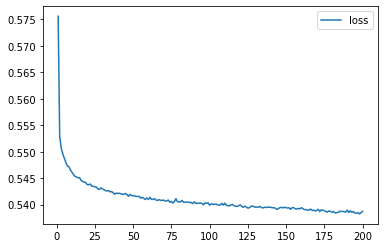

In [23]:
# Plot the loss
df_plot.plot(y="loss")
                       
# our loss function being what we're trying to optimize for (minimizing loss)

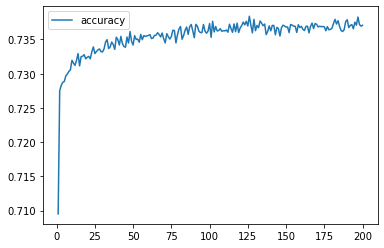

In [24]:
# Plot the accuracy
df_plot.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")